# Step 0: Import Libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load Data

In [18]:
df = pd.read_excel("data/Inflation_Data_in_Excel.xlsx")

In [19]:
df.head()

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
0,2025,9,September 2025,18.02,23.46,16.87,24.06,19.10,22.15,19.53,22.39
1,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
2,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
3,2025,6,June 2025,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
4,2025,5,May 2025,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51


# Step 2: Combine Year and Month into Datetime

In [20]:
# Combine into a proper datetime column (1st day of each month)
df["tperiod"] = pd.to_datetime(
    df["tyear"].astype(str) + "-" + df["tmonth"].astype(str) + "-01", format="%Y-%m-%d"
)

In [21]:
# Preview combined column
df[["tyear", "tmonth", "tperiod"]].head()

,tyear,tmonth,tperiod
0,2025,9,2025-09-01
1,2025,8,2025-08-01
2,2025,7,2025-07-01
3,2025,6,2025-06-01
4,2025,5,2025-05-01


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 273 entries, 0 to 272
Data columns (total 12 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   tyear                               273 non-null    int64         
 1   tmonth                              273 non-null    int64         
 2   period                              273 non-null    object        
 3   allItemsYearOn                      273 non-null    float64       
 4   allItemsAverage                     273 non-null    float64       
 5   foodYearOn                          273 non-null    float64       
 6   foodAverage                         273 non-null    float64       
 7   allItemsLessFrmProdYearOn           273 non-null    float64       
 8   allItemsLessFrmProdAverage          273 non-null    float64       
 9   allItemsLessFrmProdAndEnergyYearOn  273 non-null    float64       
 10  allItemsLessFrmProdAndEner

# Step 3: Set Index and Sort Data

In [23]:
# Set datetime as index
df = df.set_index("tperiod")
df

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
tperiod,,,,,,,,,,,
2025-09-01,2025,9,September 2025,18.02,23.46,16.87,24.06,19.10,22.15,19.53,22.39
2025-08-01,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
2025-07-01,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
2025-06-01,2025,6,June 2025,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
2025-05-01,2025,5,May 2025,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51
...,...,...,...,...,...,...,...,...,...,...,...
2003-05-01,2003,5,May 2003,8.70,10.00,3.30,6.30,17.60,16.30,15.50,11.30
2003-04-01,2003,4,April 2003,8.30,10.10,3.30,6.90,16.90,15.60,17.60,10.40
2003-03-01,2003,3,March 2003,5.90,10.50,0.10,7.90,15.40,15.00,13.90,9.40


In [24]:
# Sort index in descending order (latest first)
df = df.sort_index(ascending=False)
df

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
tperiod,,,,,,,,,,,
2025-09-01,2025,9,September 2025,18.02,23.46,16.87,24.06,19.10,22.15,19.53,22.39
2025-08-01,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
2025-07-01,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
2025-06-01,2025,6,June 2025,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
2025-05-01,2025,5,May 2025,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51
...,...,...,...,...,...,...,...,...,...,...,...
2003-05-01,2003,5,May 2003,8.70,10.00,3.30,6.30,17.60,16.30,15.50,11.30
2003-04-01,2003,4,April 2003,8.30,10.10,3.30,6.90,16.90,15.60,17.60,10.40
2003-03-01,2003,3,March 2003,5.90,10.50,0.10,7.90,15.40,15.00,13.90,9.40


# Step 4: Clean Numeric Columns
Sometimes Excel reads numbers as text, so it’s good practice to ensure all numeric fields are numeric:

In [25]:
# Ensure numeric columns are actually numeric
num_cols = [
    "allItemsYearOn",
    "allItemsAverage",
    "foodYearOn",
    "foodAverage",
    "allItemsLessFrmProdYearOn",
    "allItemsLessFrmProdAverage",
    "allItemsLessFrmProdAndEnergyYearOn",
]

# Convert to numeric (ignore errors gracefully)
for col in num_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors="coerce")

In [26]:
# Checking for missing values:
df.isnull().sum()

tyear                                 0
tmonth                                0
period                                0
allItemsYearOn                        0
allItemsAverage                       0
foodYearOn                            0
foodAverage                           0
allItemsLessFrmProdYearOn             0
allItemsLessFrmProdAverage            0
allItemsLessFrmProdAndEnergyYearOn    0
allItemsLessFrmProdAndEnergyAvg       0
dtype: int64

# Step 5: Resample to Yearly Frequency

In [27]:
# List of columns to extract yearly averages
cols = [
    "allItemsYearOn",
    "foodYearOn",
    "allItemsLessFrmProdYearOn",
    "allItemsLessFrmProdAndEnergyYearOn",
]

# Resample to yearly frequency and compute mean
yearly_inflation = df[cols].resample("YE").mean().round(2)

# Extract year from datetime index
yearly_inflation["year"] = yearly_inflation.index.year

# Reorder columns
yearly_inflation = yearly_inflation[["year"] + cols]

# Reset index
yearly_inflation.reset_index(drop=True, inplace=True)
yearly_inflation.head()

,year,allItemsYearOn,foodYearOn,allItemsLessFrmProdYearOn,allItemsLessFrmProdAndEnergyYearOn
0,2003,13.93,6.01,26.83,19.62
1,2004,15.38,14.56,16.94,13.79
2,2005,17.85,23.02,8.98,10.59
3,2006,8.38,5.93,12.79,13.88
4,2007,5.42,1.92,9.34,3.21


# Step 6: Monthly Statistics

In [28]:
# Compute monthly statistics
monthly_stats = pd.DataFrame(
    {
        "Mean": df[cols].mean().round(2),
        "Max": df[cols].max().round(2),
        "Min": df[cols].min().round(2),
    }
)

# Compute monthly growth rates
monthly_growth = df[cols].pct_change() * 100
monthly_stats["Avg_Monthly_GrowthRate(%)"] = monthly_growth.mean().round(2)

monthly_stats

,Mean,Max,Min,Avg_Monthly_GrowthRate(%)
allItemsYearOn,14.29,34.60,3.0,0.93
foodYearOn,15.36,40.87,-3.7,20.71
allItemsLessFrmProdYearOn,13.20,41.20,-0.4,4.18
allItemsLessFrmProdAndEnergyYearOn,12.62,28.75,-6.5,-11.38


# Step 7: Yearly Statistics

In [29]:
# Aggregate monthly data to yearly averages
yearly_avg = df[cols].resample("YE").mean()

yearly_stats = pd.DataFrame(
    {
        "Mean": yearly_avg.mean().round(2),
        "Max": yearly_avg.max().round(2),
        "Min": yearly_avg.min().round(2),
        "Avg_Yearly_GrowthRate(%)": yearly_avg.pct_change().mean().round(2),
    }
)

yearly_stats

,Mean,Max,Min,Avg_Yearly_GrowthRate(%)
allItemsYearOn,14.37,31.57,5.42,0.08
foodYearOn,15.43,37.27,1.92,0.40
allItemsLessFrmProdYearOn,13.30,26.83,5.06,0.05
allItemsLessFrmProdAndEnergyYearOn,12.73,25.71,3.21,0.09


# Step 8: Combine monthly and yearly stats

In [30]:
combined_stats = pd.concat(
    [monthly_stats.add_prefix("Monthly_"), yearly_stats.add_prefix("Yearly_")], axis=1
)
combined_stats

,Monthly_Mean,Monthly_Max,Monthly_Min,Monthly_Avg_Monthly_GrowthRate(%),Yearly_Mean,Yearly_Max,Yearly_Min,Yearly_Avg_Yearly_GrowthRate(%)
allItemsYearOn,14.29,34.60,3.0,0.93,14.37,31.57,5.42,0.08
foodYearOn,15.36,40.87,-3.7,20.71,15.43,37.27,1.92,0.40
allItemsLessFrmProdYearOn,13.20,41.20,-0.4,4.18,13.30,26.83,5.06,0.05
allItemsLessFrmProdAndEnergyYearOn,12.62,28.75,-6.5,-11.38,12.73,25.71,3.21,0.09


# Step 9: Plot Headline Inflation (Monthly)

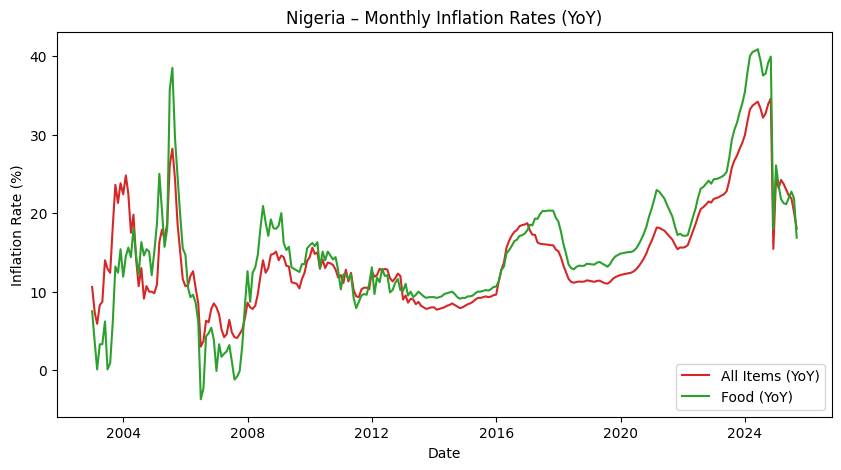

In [31]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["allItemsYearOn"], label="All Items (YoY)", color="tab:red")
plt.plot(df.index, df["foodYearOn"], label="Food (YoY)", color="tab:green")
plt.title("Nigeria – Monthly Inflation Rates (YoY)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.legend()
# plt.gca().invert_xaxis()  # show latest first (optional)
plt.show()

# Step 10: Compare Headline vs Food vs Core

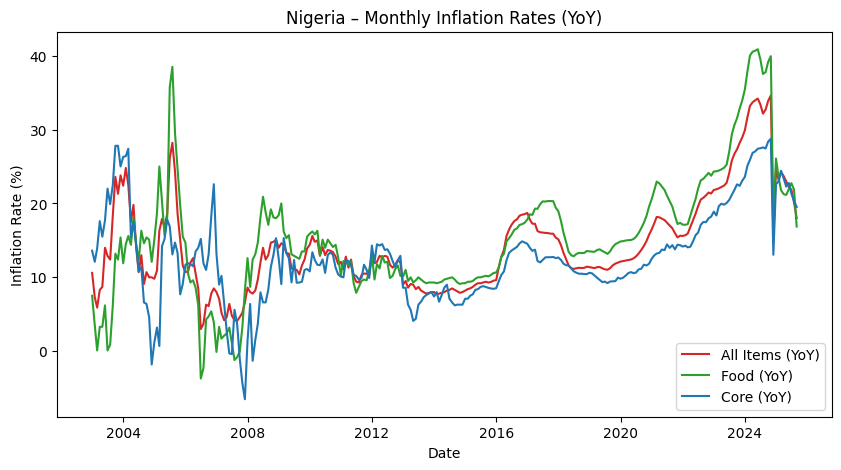

In [32]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["allItemsYearOn"], label="All Items (YoY)", color="tab:red")
plt.plot(df.index, df["foodYearOn"], label="Food (YoY)", color="tab:green")
plt.plot(
    df.index,
    df["allItemsLessFrmProdAndEnergyYearOn"],
    label="Core (YoY)",
    color="tab:blue",
)
plt.title("Nigeria – Monthly Inflation Rates (YoY)")
plt.xlabel("Date")
plt.ylabel("Inflation Rate (%)")
plt.legend()
# plt.gca().invert_xaxis()  # show latest first (optional)
plt.show()

In [33]:
# Highlight High Inflation Months (>20%)
df[df["allItemsYearOn"] > 20].head()

,tyear,tmonth,period,allItemsYearOn,allItemsAverage,foodYearOn,foodAverage,allItemsLessFrmProdYearOn,allItemsLessFrmProdAverage,allItemsLessFrmProdAndEnergyYearOn,allItemsLessFrmProdAndEnergyAvg
tperiod,,,,,,,,,,,
2025-08-01,2025,8,August 2025,20.12,24.66,21.87,25.75,20.10,22.77,20.33,23.04
2025-07-01,2025,7,July 2025,21.88,25.65,22.74,26.97,21.38,23.29,21.33,23.63
2025-06-01,2025,6,June 2025,22.22,26.60,21.97,28.28,22.43,23.69,22.76,24.14
2025-05-01,2025,5,May 2025,22.97,27.55,21.14,29.80,23.28,24.02,22.28,24.51
2025-04-01,2025,4,April 2025,23.71,28.46,21.26,31.43,24.50,24.27,23.39,24.91


# Step 11: Plot Yearly Inflation Trends

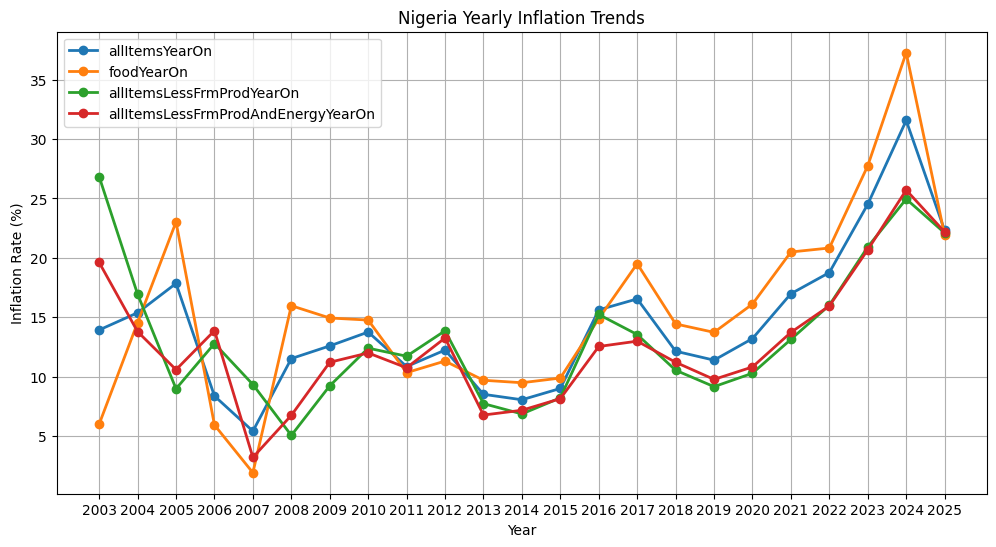

In [34]:
plt.figure(figsize=(12, 6))

# Use the datetime index directly, or extract year from it
years = yearly_avg.index.year  # this is a numpy array of years

for col in cols:
    plt.plot(years, yearly_avg[col], marker="o", linewidth=2, label=col)

plt.title("Nigeria Yearly Inflation Trends")
plt.xlabel("Year")
plt.ylabel("Inflation Rate (%)")
plt.xticks(years)  # show all years
plt.grid(True)
plt.legend()
plt.show()

# Step 12: Plot Monthly Inflation Trends

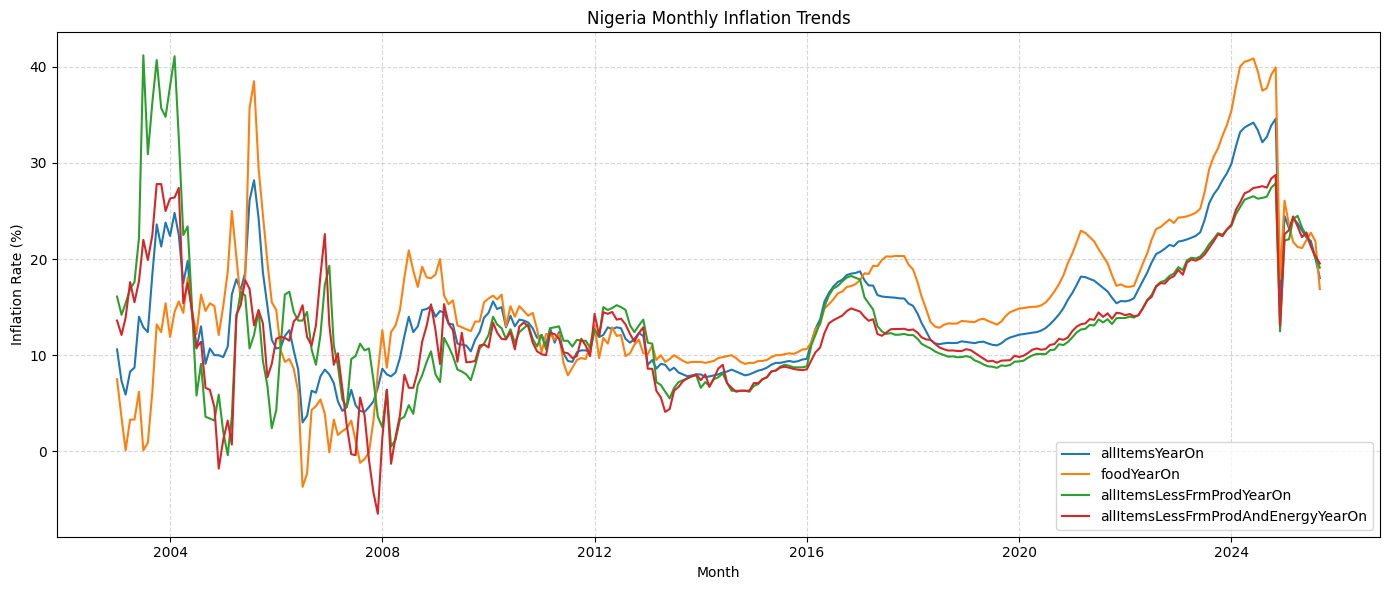

In [35]:
plt.figure(figsize=(14, 6))

for col in cols:
    plt.plot(
        df.index, df[col], marker="", linewidth=1.5, label=col
    )  # no markers for smoother line

plt.title("Nigeria Monthly Inflation Trends")
plt.xlabel("Month")
plt.ylabel("Inflation Rate (%)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.tight_layout()
plt.show()

# Step 13: Highlight Highest Inflation in 2025

In [36]:
df_2025 = df.loc["2025"]  # selects all rows in 2025

In [37]:
lowest_2025 = df_2025[cols].max().round(2)
lowest_2025

allItemsYearOn                        24.48
foodYearOn                            26.08
allItemsLessFrmProdYearOn             24.50
allItemsLessFrmProdAndEnergyYearOn    24.43
dtype: float64